In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import glob
import cPickle as pickle

In [4]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [55]:
for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure3.data_to_piechart'):
#     print subdir
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 8:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [56]:
for subdir, _, _ in os.walk(RESULTS_DIR+'C.Figure3.data_to_barchart'):
#     print subdir
    if len(subdir.split('/')) == 8:
      if len(os.listdir(subdir)) != 8:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [57]:
experiment = 'C.Figure3.data_to_barchart'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

bar_stats = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    bar_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    bar_stats[i].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

In [58]:
len(bar_stats[3][0])

4

In [59]:
experiment = 'C.Figure3.data_to_piechart'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

pie_stats = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    pie_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    pie_stats[i].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

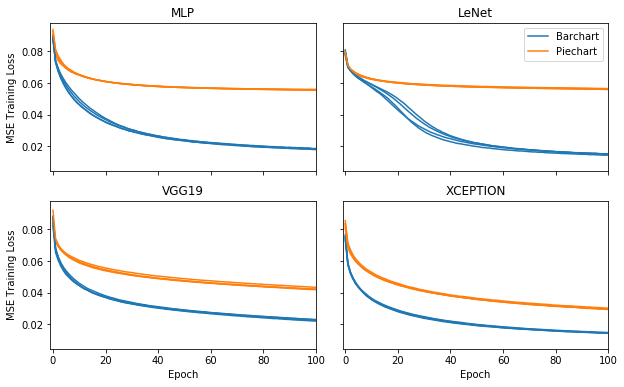

In [60]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Training Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[0][0])):
        
        # grab sample from both
        if len(bar_stats[i][0])>0:
            bar_loss = bar_stats[i][0][sample]['loss']
        else:
            bar_loss = [0]
        if len(pie_stats[i][0])>0:
            pie_loss = pie_stats[i][0][sample]['loss']
        else:
            pie_loss = [0]
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Barchart', color='C0')
            plot(pie_loss, label='Piechart', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(pie_loss, color='C1')
            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()

In [28]:
bar_stats[i]

[[]]

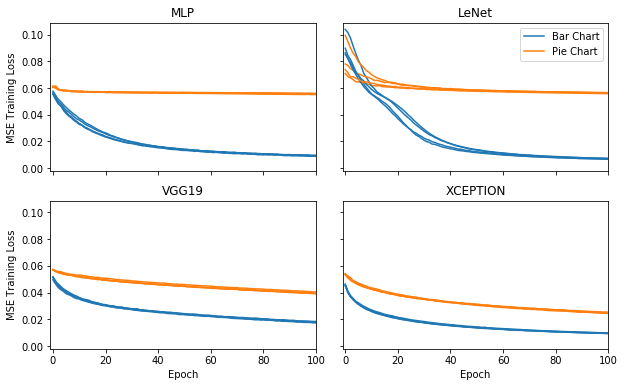

In [61]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Training Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[0][0])):
        
        # grab sample from both
        if len(bar_stats[i][0])>0:
            bar_loss = bar_stats[i][0][sample]['val_loss']
        else:
            bar_loss = [0]
        if len(pie_stats[i][0])>0:
            pie_loss = pie_stats[i][0][sample]['val_loss']
        else:
            pie_loss = [0]
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Bar Chart', color='C0')
            plot(pie_loss, label='Pie Chart', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(pie_loss, color='C1')
            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()

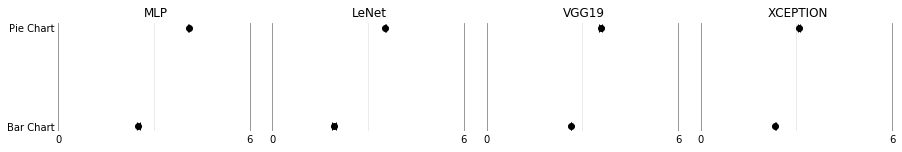

In [64]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

fig = plt.figure(figsize=(15,2), facecolor='white')
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1], wspace=.1)
# experiments = [experiments[1]]

# print experiments

j = 0
for i, c in enumerate(classifiers):

    fig = plt.subplot(gs[j])
    j += 1
    plt.title(c)


    #
    # data
    #
    labels = ['Bar Chart', 'Pie Chart']#all_labels[experiment]
    
    bar_mlae_s = []
    pie_mlae_s = []
    
    for sample in range(len(bar_stats[0][0])):

        # grab sample from both
        if len(bar_stats[i][0])>0:
            bar_mlae = bar_stats[i][0][sample]['MLAE']
        else:
            bar_mlae = [100]
        if len(pie_stats[i][0])>0:
            pie_mlae = pie_stats[i][0][sample]['MLAE']
        else:
            pie_mlae = [100]
        bar_mlae_s.append(bar_mlae)
        pie_mlae_s.append(pie_mlae)

    # grab the MIDMEANS
    data = [pie_mlae_s, bar_mlae_s]
    sorted_data = [sorted(r) for r in data]
    
    sorted_data = [[r[1],r[2]] for r in sorted_data]
#     sorted_data = 
    data = sorted_data

    means = [np.mean(r) for r in data]
    means = means[::-1] # we start counting from the bottom
#         print means

#         confidence = [mean_confidence_interval(r)[3] for r in data]

    confidence = [1.96*np.std(r) for r in data]
    confidence = confidence[::-1]
    
    y_pos = range(len(means))

    
    plt.xlim(0,6.1)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    if i != 0:
        ax.get_yaxis().set_ticks([])
    else:
#             print labels
        ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
        ax.get_yaxis().set_ticklabels(labels)

    ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
    ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
    ax.tick_params(axis=u'both', which=u'both',length=0)


    # grid lines for X
    plt.grid(True, color='gray', which='major', axis='x', alpha=1)
    plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)

    errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', color='black', capsize=4)

# plt.savefig('../PAPER/gfx/figure3_mlae.pdf', bbox_inches='tight', pad_inches=0)

In [63]:
data

[[3.0343398949034666,
  3.0661374885382444,
  3.0936846469032142,
  3.1337909927250531],
 [2.3031578188160169,
  2.3344170583034964,
  2.3434381315918311,
  2.3442289844745217]]

In [53]:
bar_stats[3][0][0]['MLAE']

2.3434381315918311

In [52]:
pie_stats[3][0][0]['MLAE']

3.1337909927250531